In [5]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import confusion_matrix

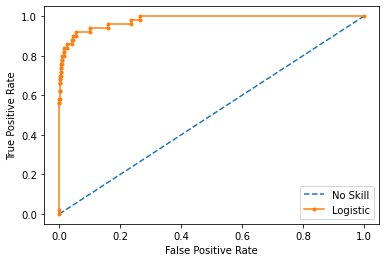

In [2]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]


# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [7]:
confusion_matrix(testy, model.predict(testX))

array([[4950,    0],
       [  23,   27]], dtype=int64)

In [4]:
unique, counts = np.unique(y, return_counts=True)

dict(zip(unique, counts))

{0: 9900, 1: 100}

In [8]:
threshold = 0.016153
y_pred = (model.predict_proba(testX)[:, 1] > threshold).astype('float')

In [9]:
confusion_matrix(testy, y_pred)

array([[4688,  262],
       [   5,   45]], dtype=int64)

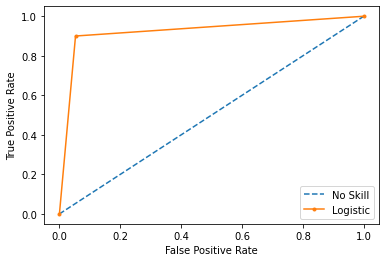

In [10]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, y_pred)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()